# Training Data Setup

## Introduction

We considered three ways to build up a training dataset, 

- Start with `user_id`: firstly, predict who would buy anything, and then predict what would they buy.
    
- Start with `sku_id`: consider each product as an object, and predict if it would be bought and by whom.
    
- Start with `user_id and sku_id` pair: take these pairs as objects and check if the any purchase activity would happen in 5 days.
    

We finally decided to start with the third method and may consider other ways when time allows.

## User and Product Pair

Features may be considered:

- **User**: age, sex, level, user_lv_cd, browse_num, addcart_num, delcart_num, buy_num, favor_num, click_num
- **Product**: attr1, attr2, attr3, cate, brand, comment_num, has_bad_comment, bad_comment_rate, browse_num, addcart_num, delcart_num, buy_num, favor_num, click_num
- **Behavior**: today_brow_num, today_addcart_num, today_delcart_num, today_buy_num, today_favor_num, today_click_num; 5day_brow_num, 5day_addcart_num, 5day_delcart_num, 5day_buy_num, 5day_favor_num, 5day_click_num;


In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import os

In [3]:
path = 'D:/JData_New/'
os.chdir(path)

In [32]:
data = pd.read_csv("JData_Action_201604.csv", header=0)

In [60]:
data.shape

(13199934, 8)

In [88]:
data.head(5)

,user_id,sku_id,time,type,user_sku
0,287842,75018,2016-03-31 23:59:01,6,287842_75018
1,208266,31662,2016-03-31 23:59:04,1,208266_31662
2,209390,118799,2016-03-31 23:59:05,6,209390_118799
3,237311,5825,2016-03-31 23:59:05,1,237311_5825
4,257651,128104,2016-03-31 23:59:05,1,257651_128104


As all data in `model_id` are missing data, it is reasonable to ignore this feature in the mdoel. In addition, feature `cate` and `brand` are already included in the `item_table`, therefore should be left out in the behavior table.

In [75]:
data['user_id'] = data['user_id'].astype(int)
data["time"] = pd.to_datetime(data["time"])

data = data.drop('model_id', 1)
data = data.drop('cate', 1)
data = data.drop('brand', 1)

### Data from April 5 to 10

In [86]:
mask_5_10 = (data['time'] > "2016-04-5") & (data['time'] < "2016-04-11") 

In [87]:
data.loc[mask_5_10].shape

(5358431, 5)

In [90]:
data_5_10 = data.loc[mask_5_10]

In [94]:
data_5_10.head()

,user_id,sku_id,time,type,user_sku
3149276,208409,135376,2016-04-05 00:00:01,6,208409_135376
3149277,214828,129711,2016-04-05 00:00:01,6,214828_129711
3149278,214828,129711,2016-04-05 00:00:01,1,214828_129711
3149279,268579,115851,2016-04-05 00:00:01,6,268579_115851
3149280,268579,115851,2016-04-05 00:00:01,6,268579_115851


In [91]:
data_5_10.to_csv('data_5_10.csv', index=False)

In [ ]:
def add_type_count(group):
    behavior_type = group.type.astype(int)
    type_cnt = Counter(behavior_type)

    group['browse_num'] = type_cnt[1]
    group['addcart_num'] = type_cnt[2]
    group['delcart_num'] = type_cnt[3]
    group['buy_num'] = type_cnt[4]
    group['favor_num'] = type_cnt[5]
    group['click_num'] = type_cnt[6]

    return group[['user_sku', 'user_id', 'sku_id',
                  'browse_num', 'addcart_num', 'delcart_num',
                  'buy_num', 'favor_num', 'click_num']]

In [ ]:
user_behavior_5_10 = data_5_10.groupby(['user_sku'], as_index=False).apply(add_type_count_today)
user_behavior_5_10 = user_behavior_5_10.drop_duplicates('user_sku')

In [96]:
user_behavior_5_10.head()

,user_sku,user_id,sku_id,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num
3149276,208409_135376,208409,135376,2,0,1,0,0,8
3149277,214828_129711,214828,129711,2,0,0,0,0,4
3149279,268579_115851,268579,115851,2,0,0,0,0,5
3149284,302666_156064,302666,156064,8,1,0,0,0,7
3149291,268662_45678,268662,45678,3,0,0,0,0,5


In [97]:
user_behavior_5_10.shape

(477985, 9)

### Data on April 10

In [77]:
mask_10 = (data['time'] > "2016-04-10") & (data['time'] < "2016-04-11") 

In [98]:
data_10 = data.loc[mask_10]

In [99]:
data_10.shape

(880913, 5)

In [180]:
def add_type_count_today(group):
    behavior_type = group.type.astype(int)
    type_cnt = Counter(behavior_type)

    group['browse_num_today'] = type_cnt[1]
    group['addcart_num_today'] = type_cnt[2]
    group['delcart_num_today'] = type_cnt[3]
    group['buy_num_today'] = type_cnt[4]
    group['favor_num_today'] = type_cnt[5]
    group['click_num_today'] = type_cnt[6]

    return group[['user_sku', 'user_id', 'sku_id',
                  'browse_num_today', 'addcart_num_today', 'delcart_num_today',
                  'buy_num_today', 'favor_num_today', 'click_num_today']]

In [101]:
user_behavior_10 = data_10.groupby(['user_sku'], as_index=False).apply(add_type_count_today)
user_behavior_10 = user_behavior_10.drop_duplicates('user_sku')

In [104]:
user_behavior_10.head()

,user_sku,user_id,sku_id,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num
7626794,259734_110899,259734,110899,2,0,0,0,0,3
7626795,242595_62476,242595,62476,0,0,0,0,0,2
7626796,262977_113675,262977,113675,2,0,0,0,0,3
7626797,271730_141243,271730,141243,2,0,0,0,0,2
7626809,236537_125756,236537,125756,4,0,0,0,0,5


In [105]:
user_behavior_10.shape

(92657, 9)

In [111]:
user_behavior_10.to_csv('user_behavior_10.csv', index=False)

### Data from April 5 to 9

In [79]:
mask_5_9 = (data['time'] > "2016-04-5") & (data['time'] < "2016-04-10") 

In [107]:
data_5_9 = data.loc[mask_5_9]
data_5_9.shape

(4477515, 5)

In [ ]:
def add_type_count_5days(group):
    behavior_type = group.type.astype(int)
    type_cnt = Counter(behavior_type)

    group['browse_num_5days'] = type_cnt[1]
    group['addcart_num_5days'] = type_cnt[2]
    group['delcart_num_5days'] = type_cnt[3]
    group['buy_num_5days'] = type_cnt[4]
    group['favor_num_5days'] = type_cnt[5]
    group['click_num_5days'] = type_cnt[6]

    return group[['user_sku', 'user_id', 'sku_id',
                  'browse_num_5days', 'addcart_num_5days', 'delcart_num_5days',
                  'buy_num_5days', 'favor_num_5days', 'click_num_5days']]

In [108]:
user_behavior_5_9 = data_5_9.groupby(['user_sku'], as_index=False).apply(add_type_count_5days)
user_behavior_5_9 = user_behavior_5_9.drop_duplicates('user_sku')

In [109]:
user_behavior_5_9.head()

,user_sku,user_id,sku_id,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num
7626794,259734_110899,259734,110899,2,0,0,0,0,3
7626795,242595_62476,242595,62476,0,0,0,0,0,2
7626796,262977_113675,262977,113675,2,0,0,0,0,3
7626797,271730_141243,271730,141243,2,0,0,0,0,2
7626809,236537_125756,236537,125756,4,0,0,0,0,5


In [110]:
user_behavior_5_9.shape

(92657, 9)

In [112]:
user_behavior_5_10.to_csv('user_behavior_5_9.csv', index=False)

### Data from April 11 to 15

In [81]:
mask_11_15 = (data['time'] > "2016-04-11") & (data['time'] < "2016-04-16") 

In [117]:
data_11_15 = data.loc[mask_11_15]

In [120]:
data_11_15 = data_11_15.drop('time', 1)

In [121]:
data_11_15.head()

,user_id,sku_id,type,user_sku
8507727,232832,4595,1,232832_4595
8507728,232832,4595,1,232832_4595
8507729,232832,4595,6,232832_4595
8507730,232832,4595,6,232832_4595
8507731,245252,7418,1,245252_7418


In [122]:
data_11_15.shape

(4692207, 4)

In [ ]:
def add_dependent(group):
    behavior_type = group.type.astype(int)
    type_cnt = Counter(behavior_type)
    
    if type_cnt[4] == 0:
        group['buy'] = 0
    else:
        group['buy'] = 1

    return group[['user_sku', 'user_id', 'sku_id', 'buy']]

In [123]:
user_behavior_11_15 = data_11_15.groupby(['user_sku'], as_index=False).apply(add_type_count_future)
# Select unique row
user_behavior_11_15 = user_behavior_11_15.drop_duplicates('user_sku')

In [124]:
user_behavior_11_15.head()

,user_sku,user_id,sku_id,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num
8507727,232832_4595,232832,4595,12,0,0,0,0,25
8507731,245252_7418,245252,7418,30,2,0,1,0,66
8507732,247398_38222,247398,38222,1,0,0,0,0,0
8507736,224358_154636,224358,154636,32,1,0,0,0,11
8507742,274699_95976,274699,95976,2,0,0,0,0,6


In [131]:
user_behavior_11_15 = user_behavior_11_15.drop('user_id', 1)
user_behavior_11_15 = user_behavior_11_15.drop('sku_id', 1)

In [132]:
user_behavior_11_15.shape

(410940, 2)

In [133]:
user_behavior_11_15.head()

,user_sku,buy_num
8507727,232832_4595,0
8507731,245252_7418,1
8507732,247398_38222,0
8507736,224358_154636,0
8507742,274699_95976,0


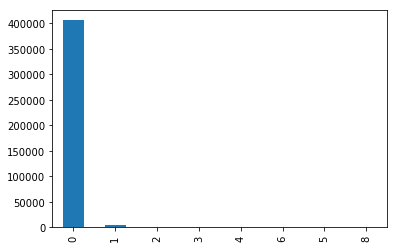

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

user_behavior_11_15.buy_num.value_counts().plot(kind='bar')

In [151]:
user_behavior_11_15.buy_num.unique()

array([0, 1, 2, 3, 6, 4, 5, 8], dtype=int64)

In [152]:
user_behavior_11_15.to_csv('user_behavior_11_15.csv', index=False)

In [159]:
user_behavior_10 = user_behavior_10.drop('user_id', 1)
user_behavior_10 = user_behavior_10.drop('sku_id', 1)
user_behavior_5_9 = user_behavior_5_9.drop('user_id', 1)
user_behavior_5_9 = user_behavior_5_9.drop('sku_id', 1)

train = pd.merge(user_behavior_10, user_behavior_5_9, on=['user_sku'], how='outer')

train.head()


,user_sku,browse_num_x,addcart_num_x,delcart_num_x,buy_num_x,favor_num_x,click_num_x,browse_num_y,addcart_num_y,delcart_num_y,buy_num_y,favor_num_y,click_num_y
0,259734_110899,2,0,0,0,0,3,2,0,0,0,0,3
1,242595_62476,0,0,0,0,0,2,0,0,0,0,0,2
2,262977_113675,2,0,0,0,0,3,2,0,0,0,0,3
3,271730_141243,2,0,0,0,0,2,2,0,0,0,0,2
4,236537_125756,4,0,0,0,0,5,4,0,0,0,0,5


In [160]:
train = pd.merge(train, user_behavior_11_15, on=['user_sku'], how='left')

train.head()

,user_sku,browse_num_x,addcart_num_x,delcart_num_x,buy_num_x,favor_num_x,click_num_x,browse_num_y,addcart_num_y,delcart_num_y,buy_num_y,favor_num_y,click_num_y,buy_num
0,259734_110899,2,0,0,0,0,3,2,0,0,0,0,3,NaN
1,242595_62476,0,0,0,0,0,2,0,0,0,0,0,2,NaN
2,262977_113675,2,0,0,0,0,3,2,0,0,0,0,3,NaN
3,271730_141243,2,0,0,0,0,2,2,0,0,0,0,2,0.0
4,236537_125756,4,0,0,0,0,5,4,0,0,0,0,5,NaN


In [171]:
print(np.count_nonzero(train.isnull()))
print(train.shape[0])
print(np.count_nonzero(train.isnull())/train.shape[0])

69402
92657
0.7490205812836591


In [174]:
train = train.fillna(0)
train.head()

,user_sku,browse_num_x,addcart_num_x,delcart_num_x,buy_num_x,favor_num_x,click_num_x,browse_num_y,addcart_num_y,delcart_num_y,buy_num_y,favor_num_y,click_num_y,buy_num
0,259734_110899,2,0,0,0,0,3,2,0,0,0,0,3,0.0
1,242595_62476,0,0,0,0,0,2,0,0,0,0,0,2,0.0
2,262977_113675,2,0,0,0,0,3,2,0,0,0,0,3,0.0
3,271730_141243,2,0,0,0,0,2,2,0,0,0,0,2,0.0
4,236537_125756,4,0,0,0,0,5,4,0,0,0,0,5,0.0


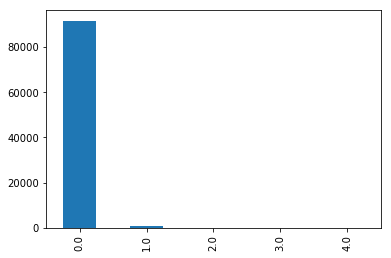

In [181]:
train.buy_num.value_counts().plot(kind='bar')

In [184]:
train.user_sku[0].rsplit('_', 1)[0]

'259734'

In [185]:
train.user_sku[0].rsplit('_', 1)[1]

'110899'

In [189]:
train['user_id'] = train.user_sku.apply(lambda x: x.rsplit('_', 1)[0]).astype(int)
train['sku_id'] = train.user_sku.apply(lambda x: x.rsplit('_', 1)[1]).astype(int)

In [190]:
user_table = pd.read_csv('user_table.csv', header=0)
item_table = pd.read_csv('item_table.csv', header=0)

In [192]:
user_table.user_id.head()

0    200001
1    200002
2    200003
3    200004
4    200005
Name: user_id, dtype: int64

In [193]:
train.user_id.head()

0    259734
1    242595
2    262977
3    271730
4    236537
Name: user_id, dtype: int32